<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/Spotify_EDA_and_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nelgiriyewithana_top_spotify_songs_2023_path = kagglehub.dataset_download('nelgiriyewithana/top-spotify-songs-2023')

print('Data source import complete.')



### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🏴‍☠️🏴‍☠️🏴‍☠️🏴‍☠️🏴‍☠️ &nbsp;&nbsp;&nbsp;&nbsp; 🌌🌌🌌🌌🌌🌌🌌

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🧙‍ <span style="color:#5E6997"> Wizard Notebook </span> 🧙‍ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🏴‍☠️ &nbsp; <span style="color:#5E6997"> F.G.J </span> &nbsp;&nbsp;🏴‍☠️ &nbsp;&nbsp;&nbsp; 🌌 &nbsp;&nbsp; <span style="color:#5E6997"> Spaceman </span> &nbsp;&nbsp;&nbsp; 🌌 &nbsp;

 ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🏴‍☠️🏴‍☠️🏴‍☠️🏴‍☠️🏴‍☠️  &nbsp;&nbsp;&nbsp;&nbsp; 🌌🌌🌌🌌🌌🌌🌌

<br>
    
<br>    

# <span style="color:#5E6997"> Spotify Data: Top 1000 Song Case Study (Data Analysis / Python) </span>

## <span style="color:#5E6997"> What Does It Take to Hit the Charts </span>

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore](#process)
* [<span style="color:#A690A4"> 3. Analyze & Visualization: Data Analysis](#analyze)


    
## <span style="color:#5E6997"> Executive Summary </span> <a class="anchor" id="exe_sum"></a>
    
### Key Findings
* Mode, Key and BPM play a bigger role than the rest.

* "Mode: Major / Minor" plays an important role for the success of a song. It has been found that:
    - The top 10: 70% of Majors vs 40% of Majors for the Last 10 and vs 55,32% overall.
    - The top 50: 68% of major vs 54% for the Last 50 and vs 55,32% overall.
    
    
* "Key": C# is the golden key. It has been found that:
    - Top 10: 30% of C# vs 10% for the last 10 songs and 14.1% overall.
    - Top 50: 24% of C# vs 14% for the last 50 songs.
    - Top 100:18% of C#.
    
    
* BPM matters, and not slowing down too much is the key. It has been found:
    - Best range is between 110 and 90.
    - Overall average is 122.
    - Top 10 BPM: average is 117, with a high standard deviation (+34). Majority of Top 10 below 110.
    - Top 10 BPM minimum is 90 and minimum overall is 65.
    
    
* Energy Score, you need to share atleast a minimum of energy to be successful:
    - Top 10: smallest standard deviation, ranging from 78 to 45 with an average of 59.6, smaller than the overall.
    - Optimal range: 78 to 45

    
### Objective & Scope
* Collect, clean & analyze Spotify dataset
* Identify variable of interest
* Allow businesses to make data-driven decisions based on the given dataset
* Share findings and insights
    
### Methodology
* **Collect** data using "top-spotify-songs-2023"
* **Wrangle** data using preprocessing, cleaning, transforming and organizing data for further analysis including predictive.
* **Explore** data using available techniques
* **Visualize** data to uncover insightful discoveries
   

## <span style="color:#5E6997"> Introduction </span> <a class="anchor" id="intro"></a>
    
**Leading questions are:**
1. What makes a song, a good song according to the dataset?
2. Can we identify variables of interest that can be used to predict wether or not (True or False) a song will make it the top top 50, top 100, top 500?
3. Can the data be transformed for Binary Classification algorithms ?
    
**Data Source**:
Data has been grabbed using Spotify API by Nidula Elgiriyewithana.
    
**Preface**:
I am conducting this analysis for fun and for "sport" as a training. I am considering this as Part 1, and Part 2 will be the predictive modeling. Also for the ones that are learning, I believe you will find some valuable information within this notebook.
Enjoy.

<br>

                 ⚜️                                                     🦅
               _______                                                ________
              |_______|                                              |________|
             /_________\                                            /__________\
            /____________\                                         /____________\
           |____|    |____|                                       |____|    |____|
          /_____/____\_____\                                     /_____/____\_____\
         /_____/______\______\                                  /_____/______\______\
        /_____/________\______\                                /_____/________\______\
       /_____/__________\______\                              /_____/__________\______\
    __/_____/____________\______\__                        __/_____/____________\______\__
    
<br>   

# <span style="color:#5E6997"> Collect, Wrangle & Explore </span> <a class="anchor" id="process"></a>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')
#df_2 = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')

df.head()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
nan_values = df.isna()
print(nan_values)

In [ ]:
any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()

for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")

print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)

print("\nMissing Value Counts in Each Column:")
print(missing_value_count)

In [ ]:
df = df.dropna(subset=['key'])

In [ ]:
# DROP NA USED
# DROP NA USED
df.dropna(inplace=True)


**DROPNA USED ON DF**

In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [ ]:
df.info()

In [ ]:
track_name_to_id = {name: idx for idx, name in enumerate(df['track_name'].unique())}

df['track_id'] = df['track_name'].map(track_name_to_id)
df.drop(columns=['track_name'], inplace=True)

In [ ]:
voi_col = ['track_id', 'streams','bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_voi = df[voi_col]
df_voi.head()

In [ ]:
#label encoding or one hot encoding?
df_features = df_voi
df_features = pd.get_dummies(df_voi, columns=['key', 'mode'], prefix=['key', 'mode'])

In [ ]:
df_features.head()

In [ ]:
#df_features = df_features.apply(pd.to_numeric, errors='coerce')

In [ ]:
#rename columns of interests
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness'
}

df_features.rename(columns=re_col, inplace=True)
df_features.head()

# <span style="color:#5E6997"> Analyze & Visualization: Data Analysis </span> <a class="anchor" id="analyze"></a>


In [ ]:
df_da = df_features.drop(columns=['track_id'])
df_da.head()

In [ ]:
#df_da = df_features.astype(int)

In [ ]:
df_da.describe()

In [ ]:
binary_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

for column in binary_columns:
    df_da[column] = df_da[column].astype(int)
print(df_da.head())

In [ ]:
df_da = df_da.astype(float)
df_da.head()

In [ ]:
df_da.shape

In [ ]:
scaler = MinMaxScaler()

df_da['streams'] = scaler.fit_transform(df_da[['streams']])
print(df_da.head())

In [ ]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_da, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()
print(correlation_matrix)

In [ ]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df_da[column], df_da['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
columns_to_plot = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da[column], df_da['streams'], c=df_da[column], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df_da = df_da.merge(df[['key']], left_index=True, right_index=True, how='inner')
df_da.head()

In [ ]:
palette = sns.color_palette("Set2", len(df_da['key'].unique()))

sns.catplot(y="key", x="streams", data=df_da, aspect=2, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.show()

In [ ]:
palette = sns.color_palette("Set2", len(df_da['key'].unique()))

sorted_keys = sorted(df_da['key'].unique())
plt.figure(figsize=(12, 6))
sns.boxplot(y="key", x="streams", data=df_da, order=sorted_keys, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys", fontsize=20)
plt.show()

In [ ]:
average_streams = df_da.groupby('key')['streams'].mean().sort_values(ascending=False).index.tolist()

palette = sns.color_palette("Set2", len(average_streams))

plt.figure(figsize=(12, 6))
sns.boxplot(y="key", x="streams", data=df_da, order=average_streams, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys (Sorted by Averaged Streams per Key)", fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="key", data=df_da, palette="Set2")
plt.xlabel("Keys", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Each Key", fontsize=16)
plt.show()

In [ ]:
key_counts = df_da['key'].value_counts().reset_index()
key_counts.columns = ['Key', 'Count']

total_count_key = key_counts['Count'].sum()
total_row = pd.DataFrame({'Key': ['Total'], 'Count': [total_count_key]})
key_counts = pd.concat([key_counts, total_row])

#------------------------

total_counts = df_da['key'].count()

is_equal = total_counts == key_counts[key_counts['Key'] == 'Total']['Count'].values[0]
print("Is total_count equal to 'Total'Key? ", is_equal)

print("Total count of values in the 'key' column:", total_counts)
print(key_counts)


In [ ]:
key_counts = key_counts[key_counts['Key'] != 'Total']
key_counts.info

In [ ]:
df_da.columns = df_da.columns.str.lower()
key_counts.columns = key_counts.columns.str.lower()

In [ ]:
merged_df = key_counts.merge(df_da, on='key')
result_df = merged_df.groupby('key')['streams'].agg(['mean', 'min', 'max']).reset_index()
result_df = result_df.rename(columns={'mean': 'avg_streams', 'min': 'min_streams', 'max': 'max_streams'})

In [ ]:
result_df.head()

In [ ]:
sorted_df = df_da.sort_values(by='streams')
lowest_10 = sorted_df.head(10)

print("10 Lowest Values:")
print(lowest_10[['key', 'streams']])


In [ ]:
# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='key', y='avg_streams', data=result_df)
plt.title('Average Streams by Key')
plt.xticks(rotation=45)
plt.show()

# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='key', y='value', hue='variable', data=pd.melt(result_df, id_vars='key'))
plt.title('Average, Minimum, and Maximum Streams by Key')
plt.xticks(rotation=45)
plt.show()

# Scat Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_streams', y='min_streams', hue='key', data=result_df)
plt.title('Scatter Plot of Average vs. Minimum Streams by Key')
plt.show()



In [ ]:
keys = result_df['key']
avg_streams = result_df['avg_streams']
min_streams = result_df['min_streams']
max_streams = result_df['max_streams']

bar_width = 0.25

# indexes x-axis
x_indexes = np.arange(len(keys))

plt.bar(x_indexes - bar_width, avg_streams, width=bar_width, label='Average Streams')
plt.bar(x_indexes, min_streams, width=bar_width, label='Minimum Streams')
plt.bar(x_indexes + bar_width, max_streams, width=bar_width, label='Maximum Streams')

plt.plot(x_indexes, avg_streams, marker='o', linestyle='-', color='b', label='Average Streams Line')
plt.xticks(x_indexes, keys)
plt.xlabel('Keys')
plt.ylabel('Streams')
plt.title('Average, Minimum, and Maximum Streams by Key')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df_da.columns

In [ ]:
df_da.shape

In [ ]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

unique_keys = df_da['key'].unique()

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    for key in unique_keys:
        plt.sca(axes[i])
        plt.scatter(df_da[df_da['key'] == key][column], df_da[df_da['key'] == key]['streams'], label=key, alpha=0.5)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Streams', fontsize=12)
        plt.title(f'Streams vs. {column}', fontsize=14)
        plt.grid(True)
        plt.legend(title='Key', loc='upper right', bbox_to_anchor=(1.2, 1))

for j in range(len(unique_keys), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

unique_keys = df_da['key'].unique()

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    for key in unique_keys:
        plt.sca(axes[i])
        plt.scatter(df_da[df_da['key'] == key]['key'], df_da[df_da['key'] == key][column], label=key, alpha=0.5)
        plt.xlabel('Key', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.title(f'{column} vs. Key', fontsize=14)
        plt.grid(True)
        plt.legend(title='Key', loc='upper right', bbox_to_anchor=(1.2, 1))

for j in range(len(unique_keys), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
columns_to_plot = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da['bpm'], df_da[column], c=df_da[column], cmap=colormap, alpha=0.5)

    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. BPM', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
columns_to_plot = ['valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da[column], df_da['danceability'], c=df_da['danceability'], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Danceability', fontsize=12)
    plt.title(f'Danceability vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Danceability')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
columns_to_plot = ['energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da[column], df_da['valence'], c=df_da['valence'], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Valence', fontsize=12)
    plt.title(f'{column} vs. Valence', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Valence')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
columns_to_plot = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da['energy'], df_da[column], c=df_da['energy'], cmap=colormap, alpha=0.5)

    plt.xlabel('Energy', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Energy', fontsize=14)
    plt.grid(True)

    plt.colorbar(scatter, label='Energy')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
columns_to_plot = ['instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da['acousticness'], df_da[column], c=df_da['acousticness'], cmap=colormap, alpha=0.5)

    plt.xlabel('Acousticness', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Acousticness', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Acousticness')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
columns_to_plot = ['liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da['instrumentalness'], df_da[column], c=df_da['instrumentalness'], cmap=colormap, alpha=0.5)

    plt.xlabel('Instrumentalness', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Instrumentalness', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Instrumentalness')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
columns_to_plot = ['speechiness']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    scatter = plt.scatter(df_da['liveness'], df_da[column], c=df_da['liveness'], cmap=colormap, alpha=0.5)

    plt.xlabel('Liveness', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Liveness', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Liveness')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
bpm = df_da['bpm']
danceability = df_da['danceability']
streams = df_da['streams']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(bpm, danceability, streams, c=streams, cmap='viridis', marker='o')
ax.set_xlabel('BPM')
ax.set_ylabel('Danceability')
ax.set_zlabel('Streams')

cbar = fig.colorbar(ax.scatter(bpm, danceability, streams, c=streams, cmap='viridis', marker='o'), ax=ax)
cbar.set_label('Streams', rotation=90)
plt.title('3D Scatter Plot: BPM vs. Danceability vs. Streams')
plt.show()

In [ ]:
df_da.columns

In [ ]:
top_10_songs = df_da.nlargest(10, 'streams')
top_10_songs.describe()

In [ ]:
top_50_songs = df_da.nlargest(50, 'streams')
top_50_songs.describe()

In [ ]:
top_100_songs = df_da.nlargest(100, 'streams')
top_100_songs.describe()


In [ ]:
df_da.shape

In [ ]:
top_200_songs = df_da.nlargest(200, 'streams')
top_500_songs = df_da.nlargest(500, 'streams')
top_700_songs = df_da.nlargest(700, 'streams')
top_817_songs = df_da.nlargest(817, 'streams')

last_10_songs = df_da.nsmallest(10, 'streams')
last_50_songs = df_da.nsmallest(50, 'streams')
last_100_songs = df_da.nsmallest(100, 'streams')
last_200_songs = df_da.nsmallest(200, 'streams')
last_500_songs = df_da.nsmallest(500, 'streams')


## Analysis --> Keys

In [ ]:
key_colors = {
    'key_a': 'red',
    'key_a#': 'blue',
    'key_b': 'green',
    'key_c#': 'purple',
    'key_d': 'orange',
    'key_d#': 'cyan',
    'key_e': 'magenta',
    'key_f': 'yellow',
    'key_f#': 'lime',
    'key_g': 'pink',
    'key_g#': 'brown'
}

key_columns = ['key_a', 'key_a#', 'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#', 'key_g', 'key_g#']

In [ ]:
df_da.shape

In [ ]:
#df_da2=df_da.copy()

In [ ]:
#df_da = df_da2.copy()

In [ ]:
key_df = df_da[key_columns]

key_counts = key_df.eq(1).sum()

plt.figure(figsize=(5, 5))
plt.pie(key_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=[key_colors[key] for key in key_counts.index])
plt.title('Overall Keys Distribution')
plt.axis('equal')

legend_labels = [key + f" ({key_counts[key]})" for key in key_counts.index]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=key_colors[key]) for label, key in zip(legend_labels, key_counts.index)]
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), title='Total Keys')

plt.show()




In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs]

chart_titles = ['Top 10 Songs Keys Distribution', 'Top 50 Songs Keys Distribution', 'Top 100 Songs Keys Distribution']

fig, axes = plt.subplots(1, len(dataframes), figsize=(15, 5))

for i, (df_da_copy, title) in enumerate(zip(dataframes, chart_titles)):
    key_df = df_da_copy[key_columns]

    key_counts = key_df.eq(1).sum()

    key_counts_filtered = key_counts[key_counts > 0]

    ax = axes[i]
    ax.pie(key_counts_filtered, labels=None, autopct='%1.1f%%', startangle=140, colors=[key_colors[key] for key in key_counts_filtered.index])
    ax.set_title(title)
    ax.axis('equal')

legend_labels = [key + f" ({key_counts_filtered[key]})" for key in key_counts_filtered.index]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=key_colors[key]) for label, key in zip(legend_labels, key_counts_filtered.index)]
fig.legend(handles=legend_patches, loc='upper right', title='Top 100 Keys', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']
key_of_interest = 'key_c#'

In [ ]:
df_da.shape

In [ ]:
key_counts = []
key_percentages = []

for df in dataframes:
    key_count = df[key_of_interest].eq(1).sum()
    key_counts.append(key_count)
    key_percentage = (key_count / len(df)) * 100
    key_percentages.append(key_percentage)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(labels, key_counts, color='skyblue')
plt.xlabel('Subset of Songs')
plt.ylabel(f'Count of {key_of_interest}')
plt.title(f'Distribution of {key_of_interest} in Different Subsets of Songs')

for i, count in enumerate(key_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.subplot(122)
plt.bar(labels, key_percentages, color='lightcoral')
plt.xlabel('Subset of Songs')
plt.ylabel(f'% of {key_of_interest}')
plt.title(f'Percentage of {key_of_interest} in Different Subsets of Songs')

for i, percentage in enumerate(key_percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
key_counts = []
key_percentages = []

for df in dataframes:
    key_count = df[key_of_interest].eq(1).sum()
    key_counts.append(key_count)
    key_percentage = (key_count / len(df)) * 100
    key_percentages.append(key_percentage)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(labels, key_counts, color='skyblue', alpha=0.7, label=f'Count of {key_of_interest}')
ax1.set_xlabel('Subset of Songs')
ax1.set_ylabel(f'Count of {key_of_interest}')
ax1.set_title(f'Distribution and Percentage of {key_of_interest} in Different Subsets of Songs')
ax1.set_ylim(0, max(key_counts) + 2)
#----
ax2 = ax1.twinx()
ax2.plot(labels, key_percentages, marker='o', color='lightcoral', linestyle='-', markersize=8, label=f'% of {key_of_interest}')
ax2.set_ylabel(f'% of {key_of_interest}')
ax2.set_ylim(0, max(key_percentages) + 10)

for i, percentage in enumerate(key_percentages):
    ax2.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)
#---
for i, count in enumerate(key_counts):
    ax1.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

ax1.legend(loc='upper left', framealpha=0.7)
#---
ax2.legend(loc='upper right', framealpha=0.7)

plt.tight_layout()
plt.show()

### While one might be tempted to get ride of #Keys, it appears that this is a big variable of interest.
C# appearances:
* Top 10: 30%
* Top 50: 24%
* Top 100: 18%

Starting from the last rows:
C# appearances:
* Last 10: 10%
* Last 50: 14%
* Last 100: 14%

### Massive contrast between Top 10 and Last 10, 300% factor


In [ ]:
df_da.head()

## Analysis --> Mode: Major & Minor

In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']

columns_of_interest = ['mode_major', 'mode_minor']

counts_1 = {col: [] for col in columns_of_interest}
counts_0 = {col: [] for col in columns_of_interest}

for df in dataframes:
    for col in columns_of_interest:
        count_1 = df[col].eq(1.0).sum()
        count_0 = len(df) - count_1
        counts_1[col].append(count_1)
        counts_0[col].append(count_0)

for col in columns_of_interest:
    plt.figure(figsize=(12, 6))

    plt.bar(labels, counts_1[col], color='skyblue', alpha=0.7, label=f'Count of {col} (1.0)')
    plt.xlabel('Subset of Songs')
    plt.ylabel(f'Count of {col}')
    plt.title(f'Distribution of {col} in Different Subsets of Songs')
    plt.ylim(0, max(counts_1[col]) + 2)

    for i, count in enumerate(counts_1[col]):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

    plt.twinx()
    plt.plot(labels, [(count / len(df)) * 100 for count, df in zip(counts_1[col], dataframes)], marker='o', color='lightcoral', linestyle='-', markersize=8, label=f'% of {col}')
    plt.ylabel(f'% of {col}')
    plt.ylim(0, 110)

    for i, count in enumerate(counts_1[col]):
        plt.text(i, (count / len(dataframes[i])) * 100, f'{(count / len(dataframes[i])) * 100:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.legend(loc='upper left', framealpha=0.7)
    plt.tight_layout()

plt.show()


In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']

columns_of_interest = ['mode_major', 'mode_minor']

percentages_major = []
percentages_minor = []

for df_da in dataframes:
    total_count = len(df_da)
    count_major = df_da['mode_major'].sum()
    count_minor = df_da['mode_minor'].sum()
    percentage_major = (count_major / total_count) * 100
    percentage_minor = (count_minor / total_count) * 100
    percentages_major.append(percentage_major)
    percentages_minor.append(percentage_minor)

plt.figure(figsize=(12, 6))
plt.plot(labels, percentages_major, marker='o', linestyle='-', color='skyblue', label='mode_major (True)')
plt.plot(labels, percentages_minor, marker='o', linestyle='-', color='lightcoral', label='mode_minor (True)')
plt.xlabel('Subset of Songs')
plt.ylabel('%')
plt.title('Distribution of "mode_major" and "mode_minor" in Different Subsets of Songs')
plt.legend()
plt.grid(True)

for i, (p_major, p_minor) in enumerate(zip(percentages_major, percentages_minor)):
    plt.text(i, p_major, f'{p_major:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.text(i, p_minor, f'{p_minor:.2f}%', ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
last_dataframes = [last_10_songs, last_50_songs, last_100_songs, last_200_songs, last_500_songs]
last_labels = ['Last 10', 'Last 50', 'Last 100', 'Last 200', 'Last 500']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

last_counts_1 = {col: [] for col in columns_of_interest}
last_counts_0 = {col: [] for col in columns_of_interest}

for df in last_dataframes:
    for col in columns_of_interest:
        last_count_1 = df[col].eq(1.0).sum()
        last_count_0 = len(df) - last_count_1
        last_counts_1[col].append(last_count_1)
        last_counts_0[col].append(last_count_0)

for i, col in enumerate(columns_of_interest):
    ax = axes[i]

    ax.bar(last_labels, last_counts_1[col], color='skyblue', alpha=0.7, label=f'Count of {col} (1.0)')
    ax.set_xlabel('Subset of Last Songs')
    ax.set_ylabel(f'Count of {col} (1.0)')
    ax.set_title(f'Distribution of {col} (1.0) in Different Subsets of Last Songs')
    ax.set_ylim(0, max(last_counts_1[col]) + 2)

    for j, count in enumerate(last_counts_1[col]):
        ax.text(j, count, str(count), ha='center', va='bottom', fontsize=10)

    ax2 = ax.twinx()
    ax2.plot(last_labels, [(count / len(df)) * 100 for count, df in zip(last_counts_1[col], last_dataframes)], marker='o', color='lightcoral', linestyle='-', markersize=8, label=f'% of {col} (1.0)')
    ax2.set_ylabel(f'% of {col} (1.0)')
    ax2.set_ylim(0, 110)

    for j, count in enumerate(last_counts_1[col]):
        ax2.text(j, (count / len(last_dataframes[j])) * 100, f'{(count / len(last_dataframes[j])) * 100:.2f}%', ha='center', va='bottom', fontsize=10)

    ax.legend(loc='upper left', framealpha=0.7)
    ax2.legend(loc='upper right', framealpha=0.7)
    plt.tight_layout()

plt.show()


In [ ]:
df_da.columns

### Analysis : BPM

In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']
last_dataframes = [last_10_songs, last_50_songs, last_100_songs, last_200_songs, last_500_songs]
last_labels = ['Last 10', 'Last 50', 'Last 100', 'Last 200', 'Last 500']

In [ ]:
bpm_min = []
bpm_max = []
bpm_avg = []
bpm_std = []

for df in dataframes:
    bpm_min.append(df['bpm'].min())
    bpm_max.append(df['bpm'].max())
    bpm_avg.append(df['bpm'].mean())
    bpm_std.append(df['bpm'].std())

plt.figure(figsize=(12, 6))

# Line for average BPM
plt.plot(labels, bpm_avg, marker='o', linestyle='-', color='skyblue', label='Average BPM')

# Line for max BPM
plt.plot(labels, bpm_max, marker='o', linestyle='-', color='lightcoral', label='Max BPM')

# Line for min BPM
plt.plot(labels, bpm_min, marker='o', linestyle='-', color='lightgreen', label='Min BPM')

# Line for std BPM
plt.plot(labels, bpm_std, marker='o', linestyle='-', color='gold', label='BPM Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('BPM')
plt.title('Distribution of BPM per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(bpm_avg, bpm_max, bpm_min, bpm_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
bpm_avg = []

for i, df in enumerate(dataframes):
    plt.scatter([i] * len(df), df['bpm'], label=labels[i], alpha=0.7)
    avg = df['bpm'].mean()
    bpm_avg.append(avg)

plt.plot(range(len(dataframes)), bpm_avg, marker='o', linestyle='-', color='red', label='Average BPM')
plt.xlabel('Subset of Songs')
plt.ylabel('BPM')
plt.title('TOP - Distribution of BPM for Each Subsets')
plt.xticks(range(len(dataframes)), labels, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()


### Analysis Danceability

In [ ]:
df_da.shape

In [ ]:
danceability_min = []
danceability_max = []
danceability_avg = []
danceability_std = []

for df in dataframes:
    danceability_min.append(df['danceability'].min())
    danceability_max.append(df['danceability'].max())
    danceability_avg.append(df['danceability'].mean())
    danceability_std.append(df['danceability'].std())

plt.figure(figsize=(12, 6))

# Line for average danceability
plt.plot(labels, danceability_avg, marker='o', linestyle='-', color='skyblue', label='Average Danceability')

# Line for max danceability
plt.plot(labels, danceability_max, marker='o', linestyle='-', color='lightcoral', label='Max Danceability')

# Line for min danceability
plt.plot(labels, danceability_min, marker='o', linestyle='-', color='lightgreen', label='Min Danceability')

# Line for std danceability
plt.plot(labels, danceability_std, marker='o', linestyle='-', color='gold', label='Danceability Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Danceability')
plt.title('Distribution of Danceability per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(danceability_avg, danceability_max, danceability_min, danceability_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['danceability'], bins=30, kde=True, color='skyblue')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.grid(True)
plt.show()

### Analysis Valence

In [ ]:
valence_min = []
valence_max = []
valence_avg = []
valence_std = []

for df in dataframes:
    valence_min.append(df['valence'].min())
    valence_max.append(df['valence'].max())
    valence_avg.append(df['valence'].mean())
    valence_std.append(df['valence'].std())

plt.figure(figsize=(12, 6))

# Line for average Valence
plt.plot(labels, valence_avg, marker='o', linestyle='-', color='skyblue', label='Average Valence')

# Line for max Valence
plt.plot(labels, valence_max, marker='o', linestyle='-', color='lightcoral', label='Max Valence')

# Line for min Valence
plt.plot(labels, valence_min, marker='o', linestyle='-', color='lightgreen', label='Min Valence')

# Line for std Valence
plt.plot(labels, valence_std, marker='o', linestyle='-', color='gold', label='Valence Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Valence')
plt.title('Distribution of Valence per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(valence_avg, valence_max, valence_min, valence_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['valence'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.title('Distribution of Valence')
plt.grid(True)
plt.show()

## Analysis Energy

In [ ]:
energy_min = []
energy_max = []
energy_avg = []
energy_std = []

for df_da in dataframes:
    energy_min.append(df_da['energy'].min())
    energy_max.append(df_da['energy'].max())
    energy_avg.append(df_da['energy'].mean())
    energy_std.append(df_da['energy'].std())

plt.figure(figsize=(12, 6))

# Line for average Energy
plt.plot(labels, energy_avg, marker='o', linestyle='-', color='skyblue', label='Average Energy')

# Line for max Energy
plt.plot(labels, energy_max, marker='o', linestyle='-', color='lightcoral', label='Max Energy')

# Line for min Energy
plt.plot(labels, energy_min, marker='o', linestyle='-', color='lightgreen', label='Min Energy')

# Line for std Energy
plt.plot(labels, energy_std, marker='o', linestyle='-', color='gold', label='Energy Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Energy')
plt.title('Distribution of Energy per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(energy_avg, energy_max, energy_min, energy_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['energy'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.grid(True)
plt.show()

## Analysis Acoustinecness

In [ ]:
acousticness_min = []
acousticness_max = []
acousticness_avg = []
acousticness_std = []

for df in dataframes:
    acousticness_min.append(df['acousticness'].min())
    acousticness_max.append(df['acousticness'].max())
    acousticness_avg.append(df['acousticness'].mean())
    acousticness_std.append(df['acousticness'].std())

plt.figure(figsize=(12, 6))

# Line for average Acousticness
plt.plot(labels, acousticness_avg, marker='o', linestyle='-', color='skyblue', label='Average Acousticness')

# Line for max Acousticness
plt.plot(labels, acousticness_max, marker='o', linestyle='-', color='lightcoral', label='Max Acousticness')

# Line for min Acousticness
plt.plot(labels, acousticness_min, marker='o', linestyle='-', color='lightgreen', label='Min Acousticness')

# Line for std Acousticness
plt.plot(labels, acousticness_std, marker='o', linestyle='-', color='gold', label='Acousticness Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Acousticness')
plt.title('Distribution of Acousticness per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(acousticness_avg, acousticness_max, acousticness_min, acousticness_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['acousticness'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.title('Distribution of Acousticness')
plt.grid(True)
plt.show()

### Done
### Next step is to download dataframe
### And move on to modeling

In [ ]:
df_da.head()

In [ ]:
df_da.shape

In [ ]:
df_da.columns

In [ ]:
df_da.shape

In [ ]:
df_da.drop(columns=['key'], inplace=True)
df_da.head()

In [ ]:
df_da.info()

In [ ]:
%whos

In [ ]:
df_da.to_csv('df_data_features.csv', index=False)






## 2. Penjelasan Kode dan Output

### a. Memuat dan Menyiapkan Data

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Memastikan visualisasi tampil langsung pada notebook
%matplotlib inline

# Memuat dataset dari GitHub
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv'
df = pd.read_csv(url)

# Menampilkan 5 baris pertama dataset
df.head()
```

- **Tujuan**: Memuat dataset dari URL dan menampilkan 5 baris pertama untuk inspeksi awal.
- **Output**: Tabel yang menunjukkan 5 entri pertama dari dataset, termasuk kolom seperti `title`, `type`, `release_year`, dan lainnya.

### b. Konversi Tanggal dan Ekstraksi Fitur Waktu

```python
# Konversi 'date_added' ke format datetime dan membuat fitur baru: bulan dan tahun penambahan
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_month'] = df['date_added'].dt.month
df['added_year'] = df['date_added'].dt.year
```

- **Tujuan**: Mengonversi kolom `date_added` menjadi format datetime dan mengekstrak bulan serta tahun penambahan sebagai fitur baru.
- **Output**: Dua kolom baru, `added_month` dan `added_year`, yang menunjukkan bulan dan tahun masing-masing entri ditambahkan.

### c. Ekstraksi Durasi

```python
# Feature Engineering untuk kolom 'duration'
# Kita perlu mengekstrak durasi numerik dan satuan (min atau season)
def parse_duration(x):
    # Jika nilai NaN, kembalikan None
    if pd.isna(x):
        return None, None
    # Pisahkan durasi dan satuan, misal "90 min" atau "1 Season"
    parts = x.split()
    if len(parts) == 2:
        value = int(parts[0])
        unit = parts[1]
        return value, unit
    else:
        return None, None

df[['duration_int','duration_unit']] = df['duration'].apply(lambda x: pd.Series(parse_duration(x)))

# Tampilkan beberapa baris untuk verifikasi
df[['duration', 'duration_int', 'duration_unit']].head()
```

- **Tujuan**: Mengekstrak durasi dari kolom `duration` menjadi dua kolom baru: `duration_int` (nilai numerik) dan `duration_unit` (satuan durasi).
- **Output**: Dua kolom baru yang memisahkan durasi menjadi angka dan satuan, seperti menit atau season.

---

## 3. Penjelasan Persamaan Matematika
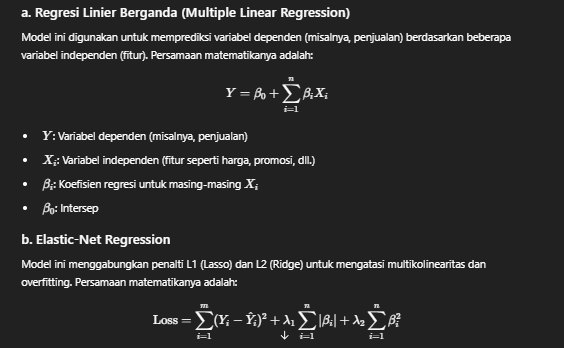


## 4. Exploratory Data Analysis (EDA) dan Visualisasi Data

### a. Distribusi Tipe Tayangan

```python
# Distribusi kategori pada 'type'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Distribusi Tipe Tayangan (Movie vs TV Show)")
plt.show()
```

- **Tujuan**: Menampilkan jumlah tayangan berdasarkan tipe (Movie atau TV Show).
- **Output**: Grafik batang yang menunjukkan distribusi antara film dan acara TV.

### b. Distribusi Tahun Rilis

```python
# Distribusi data tahun rilis
plt.figure(figsize=(10,4))
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title("Distribusi Tahun Rilis Tayangan")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Tayangan")
plt.show()
```

- **Tujuan**: Menampilkan distribusi jumlah tayangan berdasarkan tahun rilis.
- **Output**: Histogram yang menunjukkan frekuensi tayangan per tahun.

### c. Visualisasi Durasi Film

```python
# Visualisasi durasi untuk Movie (dalam menit)
plt.figure(figsize=(10,4))
sns.histplot(df[df['type'] == 'Movie']['duration_int'].dropna(), bins=20, kde=False, color='skyblue')
plt.title("Distribusi Durasi Film (dalam menit)")
plt.xlabel("Durasi (menit)")
plt.ylabel("Jumlah Film")
plt.show()
```

- **Tujuan**: Menampilkan distribusi durasi film dalam menit.
- **Output**: Histogram yang menunjukkan frekuensi durasi film.

---

Untuk melanjutkan, Anda dapat mengakses notebook Kaggle tersebut dan menjalankan kode secara langsung untuk mendapatkan hasil visualisasi dan analisis yang lebih mendalam.